# Fourier Transform and Spectral Analyses [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ua-2025q3-astr501-513/ua-2025q3-astr501-513.github.io/blob/main/513/03/notes.ipynb)

[![The Most Important Algorithm Of All Time](fig/FT.png)<br/>
The Most Important Algorithm Of All Time](https://youtu.be/nmgFG7PUHfo)

## Introduction

The Fourier Transform is a widely used method in many areas of science
and engineering.
It decomposes signals into sinusoidal components, providing direct
access to their frequency content.
It is essential for studying phenomena ranging from the distribution
of matter in the universe to signals from distant astronomical
sources.

The development of the Fast Fourier Transform (FFT) in the 20th
century transformed computational methods.
By reducing the cost of Fourier Transforms from $\mathcal{O}(N^2)$ to
$\mathcal{O}(N \log N)$, the FFT made it possible to analyze the large
datasets common in astronomy and many other fields.
Applications include:

* Communication systems
  * Signal processing:
    Encoding and decoding digital signals for efficient transmission
    across frequencies.
  * Compression:
    File formats such as MP3 (audio) and JPEG (image) exploit Fourier
    methods to represent signals in frequency space and discard less
    important components.
* Radar and sonar
  * Object detection:
    Interpreting reflected waves to measure distance, speed, and
    object properties.
  * Doppler shifts:
    Using frequency shifts in returns to determine velocities.
* Astronomy
  * Spectroscopy:
    Extracting composition, temperature, and motion from light
    spectra.
  * Imaging:
    Reconstructing high-resolution images from interferometric data.
  * Very Long Baseline Interferometry (VLBI):
    Combines telescopes across Earth to achieve extremely high
    resolution.
    It turns out that the cross-correlation of radio signals from each
    telescope pair corresponds to a Fourier coefficient of the sky
    brightness distribution.

### Historical Context and the Heat Equation

![Jean-Baptiste Joseph Fourier](fig/Fourier.png)

The origins of Fourier analysis trace back to the early 19th century
with the work of
[Jean-Baptiste Joseph Fourier (1768–1830)](https://en.wikipedia.org/wiki/Joseph_Fourier),
a French mathematician and physicist.
While studying heat flow, Fourier introduced the idea that any
periodic function could be expressed as an infinite sum of sine and
cosine functions.
Today this is known as the Fourier Series.

The one-dimensional heat equation is:
\begin{align}
  \frac{\partial u(x,t)}{\partial t}
  = \alpha \frac{\partial^2 u(x,t)}{\partial x^2},
\end{align}
where $u(x,t)$ is the temperature distribution along a rod at position
$x$ and time $t$, and $\alpha$ is the thermal diffusivity constant of
the material.

### Solution Using Separation of Variables

We use the method of separation of variables to solve the heat
equation.
It involves assuming the solution can be written as a product of
functions, each depending only on a single variable:
\begin{align}
  u(x,t) = X(x) T(t).
\end{align}

Substituting into the heat equation:
\begin{align}
  X(x) \frac{dT(t)}{dt}
  = \alpha T(t) \frac{d^2 X(x)}{dx^2}.
\end{align}
and dividing both sides by $X(x) T(t)$,
\begin{align}
  \frac{1}{T(t)} \frac{dT(t)}{dt}
  = \alpha \frac{1}{X(x)} \frac{d^2 X(x)}{dx^2}.
\end{align}

Since the left side depends only on $t$ and the right side only on
$x$, both sides must equal a constant $-\lambda$:
\begin{align}
  \frac{1}{T(t)} \frac{dT(t)}{dt}
  = -\lambda = \alpha \frac{1}{X(x)} \frac{d^2 X(x)}{dx^2}.
\end{align}
This yields two ordinary differential equations (ODEs):
1. Temporal Equation: $\frac{dT(t)}{dt} + \lambda T(t) = 0$.
2. Spatial  Equation: $\frac{d^2 X(x)}{dx^2} + \frac{\lambda}{\alpha}
   X(x) = 0$.

The general solution to the spatial equation is:
\begin{align}
  X(x) = A \sin(kx) + B \cos(kx),
\end{align}
where $k^2 = \lambda/\alpha$.
This form of solution originates from the second-order derivative.

Assuming Dirichlet boundary conditions for a rod of length $L$:
\begin{align}
  u(0,t) = u(L,t) = 0,
\end{align}
we find:
* At $x = 0$, $X(0) = 0 \implies B = 0$.
* At $x = L$, non-trivial solutions ($A \neq 0$) require:
  \begin{align}
    \sin(kL) = 0 \implies kL = n\pi, \quad n = 1,2,3,\dots
  \end{align}

Thus, the "eigenvalues" are:
\begin{align}
  k_n = \frac{n\pi}{L},
\end{align}
and the eigenfunctions are:
\begin{align}
  X_n(x) = \sin\left(\frac{n\pi x}{L}\right).
\end{align}

With $\lambda_n = \alpha k_n^2$, the temporal ODE becomes:
\begin{align}
  \frac{dT_n(t)}{dt}
  + \alpha \left(\frac{n\pi}{L}\right)^2 T_n(t) = 0.
\end{align}
The solution is
\begin{align}
  T_n(t)
  = C_n \exp\left[-\alpha \left(\frac{n\pi}{L}\right)^2 t\right].
\end{align}

Combining spatial and temporal parts and realizing the heat equation
is linear, the general solution is the sum of all solutions:
\begin{align}
  u(x,t) = \sum_{n=1}^\infty C_n \sin\left(\frac{n\pi x}{L}\right)
  \exp\left[-\alpha \left( \frac{n\pi}{L} \right)^2 t\right],
\end{align}
and the coefficients $C_n$ are determined from the initial condition
$u(x,0) = f(x)$:
\begin{align}
  C_n = \frac{2}{L} \int_0^L f(x) \sin\left(\frac{n\pi x}{L}\right) dx.
\end{align}
This represents the Fourier sine series expansion of $f(x)$.

### Inner Products and Hilbert Spaces

An inner product in a function space is a generalization of the dot
product from finite-dimensional vector spaces to infinite-dimensional
spaces of functions.
For functions $f(x)$ and $g(x)$ defined over an interval $[a, b]$, the
inner product is:
\begin{align}
  \langle f, g \rangle = \int_a^b f(x) g^*(x) \, dx,
\end{align}
where $g^*(x)$ denotes the complex conjugate of $g(x)$.

The sine and cosine functions used in the Fourier Series form an
orthogonal (and can be normalized to be orthonormal) set with respect
to this inner product:
\begin{align}
  \left\langle\cos\left(\frac{2n\pi x}{L}\right),
              \cos\left(\frac{2m\pi x}{L}\right)\right\rangle =
  \begin{cases}
    0,   & n \ne m, \\
    L/2, & n = m,
  \end{cases}
\end{align}
and similarly for the sine functions.

A Hilbert space is a complete vector space equipped with an inner
product.
Functions that are square=integrable over a given interval form a
Hilbert space, denoted as $L^2([a, b])$.
The Fourier Series represents functions in $L^2$ as infinite linear
combinations of orthonormal basis functions.

By projecting a function onto the orthonormal basis of sines and
cosines, we obtain the Fourier coefficients, which serve as the
"coordinates" of the function in this function space.
Thus, the Fourier Series can be viewed as a coordinate transformation
from the "time" or "spatial" domain to the "frequency" or "wavenumber"
domain.
This transformation is analogous to expressing a vector in terms of
its components along orthogonal axes in finite-dimensional space.

### An Example

Consider a square wave function defined over the interval
$[-L/2, L/2)$:
\begin{align}
  g(x) =
  \begin{cases}
     1, & 0 < x < L/2, \\
    -1, & -L/2 < x < 0.
  \end{cases}
\end{align}

The Fourier coefficients for this function can be computed using the
integrals above.
Due to the function's odd symmetry, only sine terms are present (i.e.,
$A_n = 0$).
The Fourier coefficients $B_n$ are:
\begin{align}
  B_n = \frac{4}{n\pi}
  \begin{cases}
    0, & \text{even } n, \\
    1, & \text{odd } n.
  \end{cases}
\end{align}
This series expansion demonstrates how complex functions can be
represented as infinite sums of simple orthogonal functions.

We can implement the Fourier Series representation of functions using
Python.
We compute the Fourier coefficients numerically and reconstruct the
original function from these coefficients.


In [1]:
import numpy as np

def g(x, L):
    return np.where((x % L) < L/2, 1, -1)

def g_approx(x, L, N):
    s = np.zeros_like(x)
    for n in range(1, N + 1, 2):  # sum over odd n
        B  = 4 / (n * np.pi)
        s += B * np.sin(2 * n * np.pi * x / L)
    return s

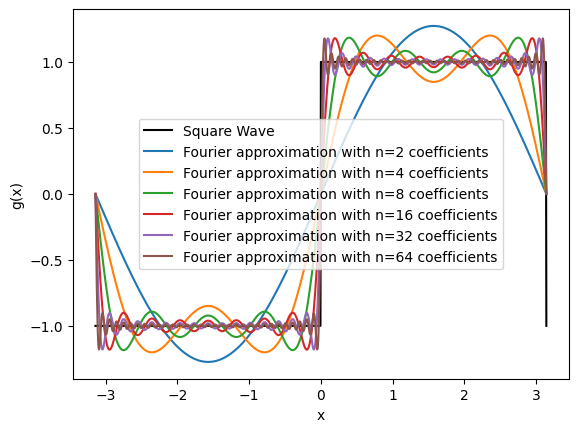

In [2]:
import matplotlib.pyplot as plt

L = 2 * np.pi  # period is 2 pi
X = np.linspace(-L/2, L/2, 1001)

# Original function
G = g(X, L)
plt.plot(X, G, label='Square Wave', color='k')

# Fourier series approximation
for n in [2,4,8,16,32,64]:
    G_n = g_approx(X, L, n)
    plt.plot(X, G_n,
             label=f'Fourier approximation with n={n} coefficients')

plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

In [3]:
# HANDSON: change the nubmer of coefficients above and
#          observe how the Fourier approximations change


Near points of discontinuity in the function (e.g., the jumps in a
square wave), the Fourier series overshoots the function's value.
This overshoot does not diminish when more terms are added;
instead, the maximum overshoot approaches a finite limit ($\sim 9\%$
of the jump's magnitude).
This is known as the
[Gibbs Phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

## Implementing Fourier Series in Python

We will implement the Fourier Series representation of functions using
Python.
We will compute the Fourier coefficients numerically and reconstruct
the original function from these coefficients.

In [4]:
def An(g, x, L, n):
    I = g(x) * np.cos(2 * n * np.pi * x / L)
    return (2 / L) * np.trapezoid(I, x)

def Bn(g, x, L, n):
    I = g(x) * np.sin(2 * n * np.pi * x / L)
    return (2 / L) * np.trapezoid(I, x)

In [5]:
def Fourier_coefficients(g, x, L, N):
    A = [An(g, x, L, n) for n in range(0, N)]
    B = [Bn(g, x, L, n) for n in range(0, N)]
    return A, B

In [6]:
def Fourier_series(A, B, L, x):
    s = (A[0]/2) * np.ones_like(x)
    for n, An in enumerate(A[1:],1):
        s += An * np.cos(2 * n * np.pi * x / L)
    for n, Bn in enumerate(B[1:],1):
        s += Bn * np.sin(2 * n * np.pi * x / L)
    return s

Now, we can obtain Fourier series numerically using arbitrary
functions.

In [7]:
def g(x, L=L):
    a = -L/2
    b =  L/2
    x = (x - a) % (b - a) + a
    return np.exp(-x*x*32)

X    = np.linspace(-L/2, L/2, 10_001)
A, B = Fourier_coefficients(g, X, L, 101)

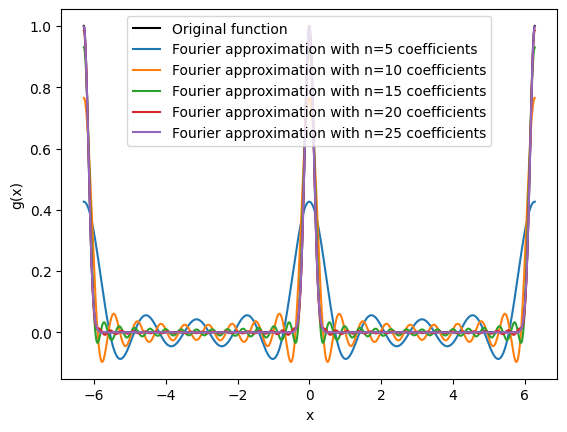

In [8]:
# Original function
X = np.linspace(-L, L, 20_001)  # note that we double the domain size for plotting
G = g(X)
plt.plot(X, G, color='k', label='Original function')

# Fourier series approximation
N   = list(range(5,100,5))
G_N = [Fourier_series(A[:n], B[:n], L, X) for n in N]
for n, G_n in list(zip(N, G_N))[:5]:
    plt.plot(X, G_n,
             label=f'Fourier approximation with n={n} coefficients')

plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()

In [9]:
# HANDSON: change the nubmer of coefficients above and
#          observe how the Fourier approximations change


### Error Analysis

We can quantify how the approximation improves with $N$ by calculating
the Mean Squared Error (MSE) between the original function and its
Fourier series approximation.

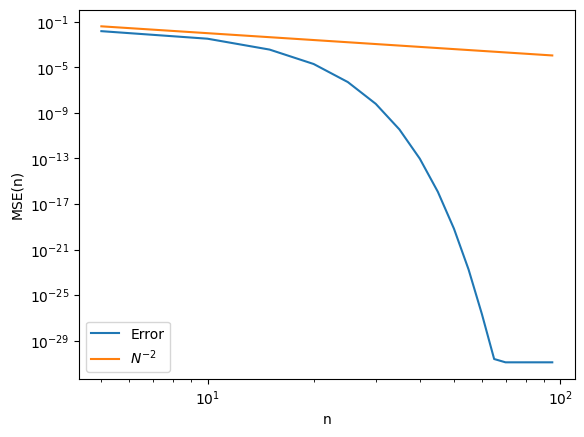

In [10]:
def mse(G, G_n):
    dG = (G - G_n)
    return np.mean(dG * dG)

Errs = [mse(G, G_n) for G_n in G_N]

plt.loglog(N, Errs,               label='Error')
plt.loglog(N, np.array(N)**(-2.), label=r'$N^{-2}$')

plt.xlabel('n')
plt.ylabel('MSE(n)')
plt.legend()

In [11]:
# HANDSON: Try using different functions and observe how the errors behave.


## Complex Fourier Series

It is often convenient to combine the sines and cosines in a Fourier
series into a single exponential term using Euler's formula:
\begin{align}
  e^{i\theta} = \cos(\theta) + i\sin(\theta).
\end{align}
Therefore,
\begin{align}
  \cos(\theta) &= \frac{e^{i\theta} + e^{-i\theta}}{2}, \\
  \sin(\theta) &= \frac{e^{i\theta} - e^{-i\theta}}{2i}.
\end{align}

Substituting these into the definition of the Fourier series, we
obtain the Complex Fourier Series:
\begin{align}
  g(x) = \sum_{n=-\infty}^{\infty} C_n e^{i n \omega_1 x},
\end{align}
where $\omega_1 = 2\pi/L$ is the fundamental angular frequency.

The complex coefficients $C_n$ are given by:
\begin{align}
  C_n = \frac{1}{L} \int_{-L/2}^{L/2} g(x) e^{-i n \omega_1 x} dx.
\end{align}

```{admonition} Exercises

What are the relationship between the complex Fourier coefficients
$C_n$ and the Fourier series coefficients $A_n$ and $B_n$?
```

If $g(x)$ is purely real, then the complex Fourier coefficients
satisfy the conjugate symmetry:
\begin{align}
  C_{-n} = C_n^*,
\end{align}
where $C_n^*$ denotes the complex conjugate of $C_n$.
This property, sometimes referred as Hermitian, Hermit symmetry, or
conjugate symmetry, ensures that the Fourier series representation
remains real-valued.

```{admonition} Exercises

Demonstrate the Hermit symmetry using the relationship between the
complex Fourier coefficients $C_n$ and the Fourier series coefficients
$A_n$ and $B_n$ derived above.
```

In the context of complex Fourier series, the functions $\exp(i n
\omega_1 x)$ form an orthonormal set under the inner product:
\begin{align}
  \langle e^{i n \omega_1 x}, e^{i m \omega_1 x}\rangle
  = \int_{-L/2}^{L/2} e^{i n \omega_1 x} e^{-i m \omega_1 x} dx = L \delta_{n m},
\end{align}
where $\delta_{n m}$ is the Kronecker delta function.

The Fourier coefficients $C_n$ are obtained by projecting $g(x)$ onto
these orthonormal basis functions, analogous to finding the components
of a vector along orthogonal axes.
Thus, the Fourier series expansion is a coordinate transformation from
the function space to the space spanned by the basis functions $\exp(i
n \omega_1 x)$.

In [12]:
# HANDSON: Implement functions for complex Fourier series using the
#          above functions.
#          Demostrate that complex Fourier series can recover complex
#          functions with exponential convergence.


In [13]:
# HANDSON: use Hermitian symmetry to implement a complex Fourier
#          series reconstruction function that requires only half of
#          the Fourier coefficients in order to construct a
#          real-valued function.


## Transition to Fourier Transform

In the previous sections, we shown how periodic functions can be
represented as sums of sines and cosines using Fourier Series.
However, many functions of interest in physics and engineering are not
periodic or are defined over an infinite domain.
To analyze such functions, we need to extend the concept of a Fourier
Series to Fourier Transform.

### From Discrete to Continuous Spectrum

For a function $g(x)$ with period $L$, the Fourier Series has discrete
(spatial) frequencies $\omega_n = 2n\pi/L \equiv n \omega_1$.

As the period $L$ becomes infinitely large ($L \rightarrow \infty$),
the spacing between the frequencies in the Fourier Series becomes
infinitesimally small, turning the sum into an integral:
\begin{align}
  \sum_{n=-\infty}^{\infty} \rightarrow
  \int_{-\infty}^{\infty} \frac{d\omega}{\omega_1}.
\end{align}
The discrete set of frequencies $\omega_n$ becomes a continuous
variable $\omega$.
This limit leads us to the Fourier Transform, which represents
non-periodic functions defined over the entire real line.

### Complex Fourier Transform Definitions

The Fourier Transform $G(\omega)$ of a function $g(x)$ is defined as:
\begin{align}
  G(\omega) = \int_{-\infty}^{\infty} g(x) e^{-i \omega x} dx.
\end{align}
The Inverse Fourier Transform is:
\begin{align}
  g(x) = \frac{1}{2\pi}
  \int_{-\infty}^{\infty} G(\omega) e^{i \omega x} d\omega.
\end{align}
These equations allow us to transform a time-domain function $g(x)$
into its frequency-domain representation $G(\omega)$, and vice versa.

If $g(x)$ is real-valued, then $G(-\omega) = G^*(\omega)$ similar to
the Fourier series case.
This property ensures that the inverse transform remains a real
function.

In the context of the Fourier Transform, the inner product between two
functions $f(x)$ and $g(x)$ over the entire real line is:
\begin{align}
  \langle f, g\rangle = \int_{-\infty}^{\infty} f(x) g^*(x) dx.
\end{align}
The functions $e^{i \omega x}$ form an orthogonal set with respect to
this inner product.
As a result, similar to the Fourier series, the Fourier transform can
be seen as projecting $g(x)$ onto the basis of complex exponentials
$e^{i \omega x}$, except that these basis functions now form an
infinite-dimensional linear space.
The transform coefficients $G_\omega \equiv G(\omega)$ represent the
"coordinates" of $g(x)$ in the frequency domain.

## Sampling Theory and the Discrete Fourier Transform (DFT)

Here, we study what happens when continuous signals are sampled.
We will introduce the Nyquist Sampling Theorem, explain aliasing, and
show how the Discrete Fourier Transform (DFT) lets us analyze sampled
data.
To emphasize the time-dependent nature of (astronomical) signals, we
use the notation $g(t)$ instead of $g(x)$.

### Sampling Continuous Signals

When working with real-world signals, we often need to convert
continuous signals into discrete values for digital processing.

This conversion is achieved through sampling, where a continuous
signal $g(t)$ is measured (may be integrated) at discrete intervals.

The distinction between continuous and discrete signals are:
* Continuous Signal:
  a function $g(t)$ defined for all real values of $t$.
* Discrete Signal:
  A sequence of values $g_n = g(n T_s)$, where $T_s$ is the sampling
  interval (the time between samples) and $n$ is an integer index.

The sampling frequency $f_s$ is $f_s = \frac{1}{T_s}$, and the
sampling angular frequency is $\omega_s = 2\pi f_s$.

Understanding how to sample a continuous signal without losing
essential information is important.
Intuitively, if the sampling rate is too low, important details in the
signal may be missed, leading to errors in analysis.

### The Nyquist Sampling Theorem

The Nyquist Sampling Theorem sets the minimum sampling rate needed to
capture a continuous, band-limited signal without losing information.

```{theorem}

A signal with maximum frequency $g_{\max}$ can be perfectly
reconstructed if the sampling frequency satisfies
\begin{align}
  f_s > 2 f_{\max}.
\end{align}
```

Here,
* The minimum required sampling rate, $f_\text{Nyquist} = 2 f_{\max}$,
  is called the Nyquist rate.
* And the highest frequency that can be correctly represented at
  sampling rate $f_s$, $f_{\text{Nyquist}} = \tfrac{f_s}{2}$, is the
  Nyquist Frequency.

Sampling above the Nyquist rate prevents **aliasing** (overlap of
high-frequency components).
It is required to ensure accurate reconstruction of the original
signal.

### Aliasing Effect in Time (or Sptial) Domain

Aliasing happens when we sample a signal too slowly (below the Nyquist
rate).
In this case, high-frequency components cannot be distinguished and
instead appear as lower-frequency components in the sampled data.

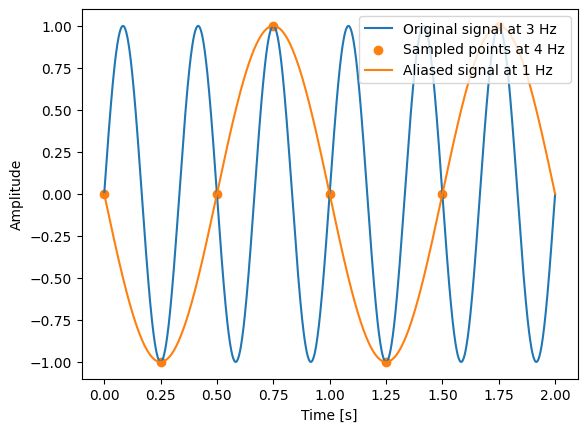

In [14]:
# Parameters
f  = 3  # frequency of the original signal in Hz
fs = 4  # sampling frequency in Hz (below Nyquist rate)
fa = 1  # aliased frequency in Hz (due to undersampling)
t1 = 2  # duration in seconds

# Time arrays
T  = np.linspace(0, t1, 1001)   # "continuous" time
Ts = np.arange  (0, t1, 1/fs)  # discrete sampling times

# Signals
G   =  np.sin(2 * np.pi * f  * T)   # original continuous signal
Gs  =  np.sin(2 * np.pi * f  * Ts)  # sampled signal
Ga  = -np.sin(2 * np.pi * fa * T)   # aliased signal for comparison

# Plotting
plt.plot   (T,  G,  label=f'Original signal at {f} Hz', color='C0')
plt.scatter(Ts, Gs, label=f'Sampled points at {fs} Hz', color='C1')
plt.plot   (T,  Ga, label=f'Aliased signal at {fa} Hz', color='C1')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

In this example, the original signal at 3 Hz is sampled at 4 Hz, which
is below the Nyquist rate of 6 Hz (twice the signal frequency).
The sampled points misrepresent the original signal, making it appear
as if it has a frequency of 1 Hz.
This misrepresentation is the reason of aliasing.

In [15]:
# HANDSON: try out different combination of different `f` and `fs`.
#          Are you able to predict `fa` without looking at the plot?b


Another way to visualize aliasing is in images.
Specially, let's create a wave pattern as the following:

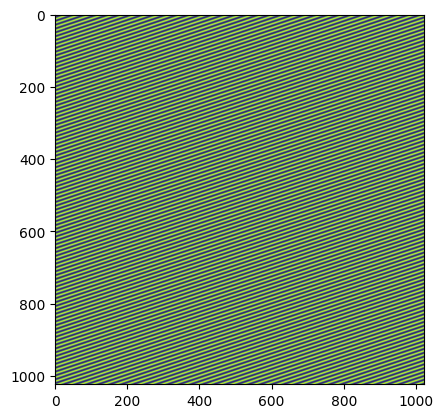

In [16]:
X    = np.linspace(-np.pi, np.pi, 1024, endpoint=False)
X, Y = np.meshgrid(X, X)
G    = np.sin(32 * (X + 3 * Y))

plt.imshow(G)

We may down sample this "groundtruth" image skipping multiple grid
points.
After doing so, the direction of the pattern completely change, as the
high (spatial) frequency mode "fold" back to the low frequency mode
that is captured by the low resolution sampling.

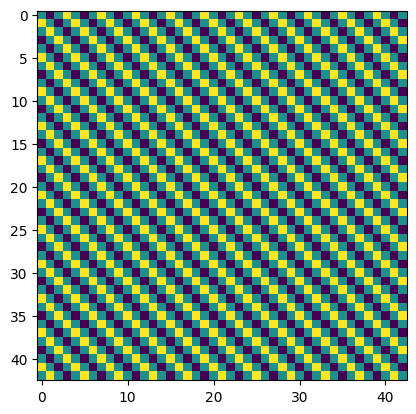

In [17]:
plt.imshow(G[::24,::24])

Aliasing can cause numerical problems in real world applications.
We will learn ways to mitigate it below after seeing DFT and FFT.

### Discrete Fourier Transform (DFT)

The Discrete Fourier Transform (DFT) analyzes the frequency content of
discrete signals.
It converts a finite set of equally spaced samples into complex
numbers that represent the signal's frequency spectrum.

Given a sequence of $N$ complex numbers $g_n$, where $n = 0, 1, 2,
\dots, N-1$, the Discrete Fourier Transform $G_k$ is defined as:
\begin{align}
  G_k = \sum_{n=0}^{N-1} g_n e^{-i 2\pi k n / N},
  \quad \text{for } k = 0, 1, 2, \dots, N-1.
\end{align}

Here, $G_k$ represents the amplitude and phase of the $k$-th frequency
component of the signal.
The inverse DFT, which allows us to reconstruct the original signal
from its frequency components, is given by:
\begin{align}
  g_n = \frac{1}{N} \sum_{k=0}^{N-1} G_k e^{i 2\pi k n / N},
  \quad \text{for } n = 0, 1, 2, \dots, N-1.
\end{align}

Understanding the properties of the DFT helps effectively apply it to
signal analysis:
* Periodicity:
  Both the input sequence $g_n$ and the output sequence $G_k$ are
  periodic with period $N$.
  This means that $g_{n+N} = g_n$ and $G_{k+N} = G_k$ for all integers
  $n$ and $k$.
  The periodicity arises from the finite length of the sequences and
  the assumption that they represent one period of a periodic signal.
* Orthogonality:
  The set of complex exponentials $e^{-i 2\pi k n / N}$ used in the
  DFT are orthogonal over the interval $n = 0, 1, \dots, N-1$.
  This orthogonality allows the DFT to decompose the signal into
  independent frequency components, analogous to how the Fourier
  Series decomposes continuous periodic functions.
* Linearity:
  The DFT is a linear transformation.
  If $f_n$ and $g_n$ are sequences and $a$ and $b$ are scalars, then
  the DFT of $a f_n + b g_n$ is $a F_k + b G_k$, where $F_k$ and $G_k$
  are the DFTs of $f_n$ and $g_n$, respectively.
* Energy Conservation (Parseval's Theorem, see below):
  The total energy of the signal is preserved between the time domain
  and the frequency domain.
  Specifically, the sum of the squares of the magnitudes of the
  time-domain samples equals $1/N$ times the sum of the squares of the
  magnitudes of the frequency-domain coefficients.

To see how the DFT works, we can implement it directly in Python.
Although in practice we use the Fast Fourier Transform (FFT, see
below), writing the DFT from scratch reveals the core computation.

In [18]:
def DFT(g):
    N = len(g)
    G = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            G[k] += g[n] * np.exp(-2j * np.pi * k * n / N)
    return G

In this function, we compute each frequency component $F_k$ by summing
over all time-domain samples $f_n$, weighted by the complex
exponential basis functions.
The nested loops result in a computational complexity of
$\mathcal{O}(N^2)$, which is acceptable for small $N$ but inefficient
for large datasets.

Let's apply the DFT to analyze a discrete signal composed of a single
sine wave:

Text(0, 0.5, 'Amplitude')

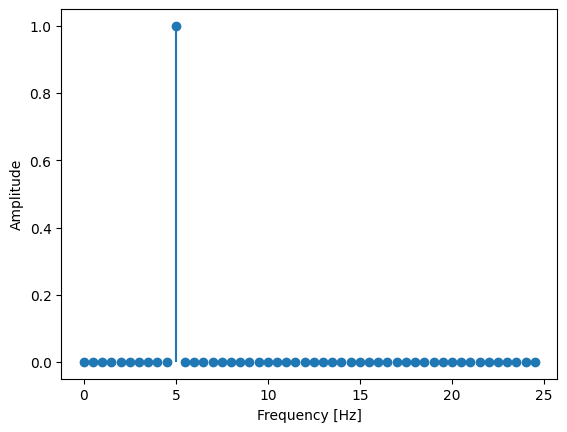

In [19]:
# Signal parameters
f  = 5    # frequency in Hz
fs = 50   # sampling frequency in Hz
N  = 100  # number of samples

Ts   = np.arange(N) / fs  # discrete sampling times without endpoint
G    = np.sin(2 * np.pi * f * Ts)  # signal generation
Ghat = DFT(G)  # compute the DFT
freq = np.fft.fftfreq(N, d=1/fs) # Frequency vector

# Plotting
plt.stem(freq[:N//2], np.abs(Ghat[:N//2]) * (2/N), basefmt=" ")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

The magnitude spectrum shows a peak at 5 Hz, matching the sine wave's
frequency and confirming that the DFT identifies the dominant
component.

*Note:* The factor $2/N$ normalizes the amplitude and ensures correct
scaling when plotting only positive frequencies.

### The DFT as a Linear Transformation

The DFT can also be expressed in matrix form.
This shows its linear (transformation) nature from the time domain to
the frequency domain.

In matrix notation:
\begin{align}
  \mathbf{G} = \mathbf{W} \mathbf{g},
\end{align}
where
$\mathbf{g}$ is the column vector of input samples $g_n$,
$\mathbf{G}$ is the column vector of DFT coefficients $G_k$, and
$\mathbf{W}$ is the DFT matrix, whose elements are
$W_{k n} = e^{-2\pi i k n / N}$.

Implementing the DFT using matrix multiplication in Python:

In [20]:
def DFT_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return W

# Compute DFT using matrix multiplication
W = DFT_matrix(N)

Text(0, 0.5, 'Amplitude')

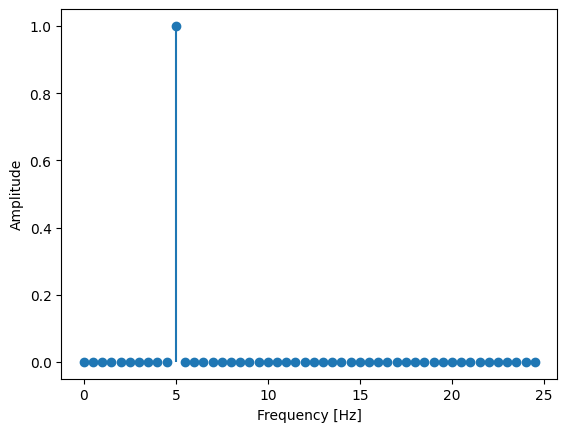

In [21]:
Gmatrix = W @ G

# Plotting
plt.stem(freq[:N//2], np.abs(Gmatrix[:N//2]) * (2/N), basefmt=" ")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

This method produces the same result as the direct computation but is
also computationally intensive with $\mathcal{O}(N^2)$ complexity.
The matrix representation is useful for theoretical analysis and
understanding properties of the DFT, such as its eigenvalues and
eigenvectors.

## Fast Fourier Transform (FFT) and Computational Efficiency

We have seen the importance of the DFT for analyzing discrete signals
in the frequency domain.
However, computing it directly is computationally intensive, with
complexity $\mathcal{O}(N^2)$, where $N$ is the number of data points.
This scaling quickly becomes impractical for large datasets, such as
those in signal processing and time-domain astronomy.
To address this, the Fast Fourier Transform (FFT) was developed.

The [Veritasium video](https://youtu.be/nmgFG7PUHfo) introduced
earlier provides an excellent story about the FFT.
To summarize: the FFT is **not** an approximation of the DFT.
Instead, it exploits symmetries in the DFT matrix to reduce the
computational cost from $\mathcal{O}(N^2)$ to $\mathcal{O}(N \log N)$.
It in fact is a numerically more stable method to compute the DFT!
This dramatic improvement makes the FFT efficient enough for large
datasets, earning it the title **the most important algorithms of all
time**.

### Historical Remark of the FFT

Although the FFT algorithm gained widespread recognition after the
publication by James Cooley and John Tukey in 1965, the fundamental
ideas behind it date back much further.
Remarkably, Carl Friedrich Gauss discovered a version of the FFT as
early as 1805.
He developed efficient methods for interpolating asteroid orbits,
which involved computations similar to the FFT, although his work in
this context remained unpublished until much later.

Over the years, several mathematicians and engineers independently
discovered and rediscovered the FFT.
It was not until Cooley and Tukey's seminal paper that the algorithm
became widely known and appreciated for its computational advantages.
Their work sparked a revolution in digital signal processing and had a
profound impact on many fields, including communications, image
processing, and astrophysics.

### Understanding the FFT Algorithm

The key idea behind the FFT is to exploit symmetries and redundancies
in the DFT calculations to reduce the number of computations required.
Specifically, the FFT algorithm employs a divide and conquer strategy.
It recursively breaks down a DFT of size $N$ into smaller DFTs,
thereby minimizing redundant calculations.

Consider the DFT of a sequence $f_n$ of length $N$:
\begin{align}
  F_k = \sum_{n=0}^{N-1} f_n e^{-i 2\pi k n / N}, \quad k = 0, 1, \dots, N-1.
\end{align}

If $N$ is even, we can separate the sum into even and odd indexed terms:
\begin{align}
  F_k            &= \sum_{n=0}^{N/2 -1} f_{2n}   e^{-i 2\pi k (2n)   / N}
                  + \sum_{n=0}^{N/2 -1} f_{2n+1} e^{-i 2\pi k (2n+1) / N} \\
                 &= \sum_{n=0}^{N/2 -1} f_{2n}   e^{-i 2\pi k   n    / (N/2)}
+ e^{-i 2\pi k / N} \sum_{n=0}^{N/2 -1} f_{2n+1} e^{-i 2\pi k   n    / (N/2)}.
\end{align}

This decomposition reveals that the DFT of size $N$ can be expressed
in terms of two DFTs of size $N/2$, one for the even-indexed samples
$f_{2n}$ and one for the odd-indexed samples $f_{2n+1}$.
This approach can be applied repeatedly/recusively until the DFTs are
reduced to size 1, at which point the computation is trivial.

By reusing the results of smaller DFTs and exploiting the periodicity
and symmetry properties of the complex exponential functions, the FFT
algorithm significantly reduces the total number of computations from
$\mathcal{O}(N^2)$ to $\mathcal{O}(N \log_2 N)$.

The computational savings provided by the FFT are substantial,
especially for large $N$.
For example, if $N = 1,000,000$:
* Direct DFT: Approximately $10^{12}$ operations.
* FFT: Approximately $20,000,000$ operations.
This reduction makes the FFT practical for large datasets and enables
real-time signal processing and efficient analysis of astronomical
data.

### Performance of DFT vs. FFT

Modern programming languages and scientific computing libraries
provide optimized implementations of the FFT algorithm.
In Python, the `numpy` library includes an `fft` module (based on a
`C` port of the `FFTPACK` Fortrean package), which offers fast and
reliable FFT computations.

Let's compare the performance of our naive DFT implementation with the
optimized FFT provided by `numpy`:

In [22]:
from numpy.fft import fft, ifft
from time import time

N = 2**np.arange(5,30)

T_dft = []
T_fft = []

for n in N:
    g = np.random.random(n)

    # Time DFT, only perform if it is small enough
    if n < 1_000:
        t0 = time()
        G  = DFT(g)
        T_dft.append(time() - t0)

    # Time FFT
    if n < 10_000_000:
        t0 = time()
        G  = fft(g)
        T_fft.append(time() - t0)

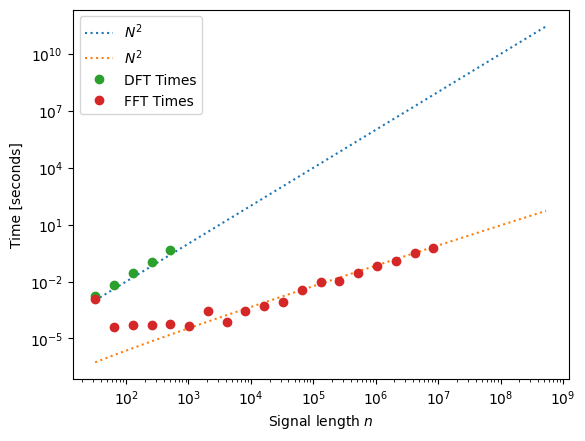

In [23]:
# Plotting the results
plt.loglog(N, 1e-6 * N*N,         ':', label=r'$N^2$')
plt.loglog(N, 5e-9 * N*np.log(N), ':', label=r'$N^2$')
plt.loglog(N[:len(T_dft)], T_dft, 'o', label='DFT Times')
plt.loglog(N[:len(T_fft)], T_fft, 'o', label='FFT Times')

plt.xlabel('Signal length $n$')
plt.ylabel('Time [seconds]')
plt.legend()

In [24]:
# HANDSON: try to compare DFT and FFT for even more number of sampling
#          points.
#          Does it still follow the expected scaling law?
#          With the same computing time, how many more sampling points
#          are we able to process with FFT?


### Variations and Generalizations of the FFT

So far, we have focused on the radix-2 FFT, which requires the input
length $N$ to be a power of two.
In practice, many other FFT algorithms extend its applicability to
arbitrary sequence lengths:
* Mixed-Radix FFT:
  Works when $N$ is a composite number.
  By factoring $N$ into smaller integers (radices such as 2, 3, 5,
  etc.), the DFT is computed recursively on each factor.
  This generalizes radix-2 to arbitrary composite sizes and is used in
  standard FFT packages such as [FFTW](https://fftw.org/).
* Integer FFT:
  A variant of the FFT designed for exact integer arithmetic.
  Instead of floating-point operations, it uses modular arithmetic
  (often with the Number Theoretic Transform, NTT).
  This allows error-free computations and makes it particularly useful
  in cryptography and computer algebra systems.
* Prime Factor FFT (Good-Thomas Algorithm):
  Used when $N$ can be factored into pairwise coprime integers.
  It reorganizes the DFT into multidimensional smaller transforms,
  avoiding twiddle factors in certain cases.
* Bluestein's Algorithm (Chirp Z-Transform):
  Computes the DFT for any $N$ by reformulating it as a convolution,
  which is then evaluated efficiently using an FFT of a larger
  size.
  This is especially useful for prime $N$.


## Aliasing in the DFT and FFT

When applying the DFT and FFT, aliasing is a key concern.
Because the sampling rate is finite, the FT treats the sampled signal
as periodic with period $N T_s$.
If the original signal contains frequencies above the Nyquist limit
($f_{\text{Nyquist}} = f_s/2$), these are "folded" back into lower
frequencies, creating false components in the spectrum.
This is aliasing as described above.

Aliasing can be misleading, as high-frequency content appears as
spurious low-frequency signals.
To avoid this, the input must be band-limited before sampling.
The most common solution is an anti-aliasing filter, i.e., a low-pass
filter that removes frequencies above the Nyquist limit.
In practice, analog filters are applied before digitization to
condition the signal.

Another strategy is oversampling, where the sampling rate is chosen
well above the Nyquist rate.
Oversampling raises the Nyquist frequency, leaving more margin against
aliasing.
More advanced methods include adaptive sampling, which varies the
sampling rate depending on the signal's frequency content at the time.

## Applications

### Spectral Filtering

Spectral filtering involves transforming a signal into the frequency
domain, modifying specific frequency components (e.g., removing
noise), and transforming it back to the time domain.

In this section, we will implement a low-pass filter.
The setup includes:
1. Generate a noisy sinusoidal signal.
2. Transform the signal into the frequency domain using the Fast
   Fourier Transform (FFT).
3. Apply a low-pass filter to remove high-frequency noise.
4. Transform the filtered signal back to the time domain.

Text(0, 0.5, 'Amplitude')

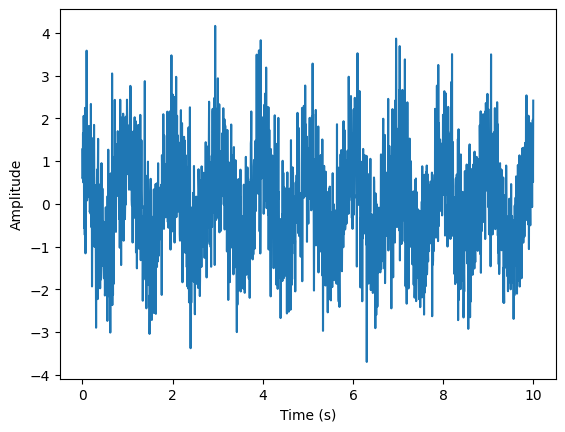

In [25]:
T = np.linspace(0, 10, num=2_000, endpoint=False)  # use high sampling rate to approximate the analytic function
S = np.cos(2 * np.pi * T)                          # periodic is 1

# Add noise
Noisy = S + np.random.normal(size=T.shape)

# Visualize the signal with noise
plt.plot(T, Noisy)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Power')

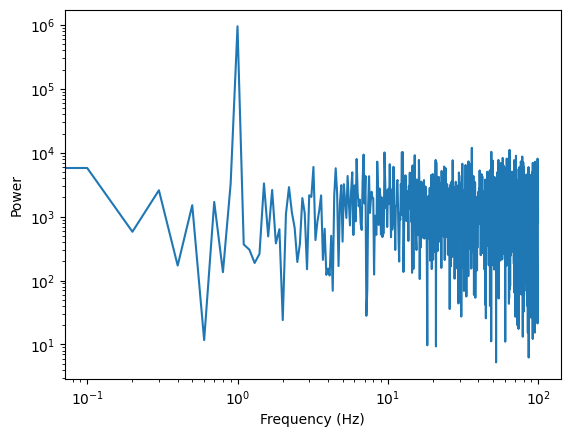

In [26]:
# Fourier Transform
F     = np.fft.fftfreq(len(T), d=T[1])
NOISY = np.fft.fft(Noisy)
Power = abs(NOISY[:len(T)//2])**2

plt.loglog(F[:len(T)//2], Power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

In [ ]:
# HANDSON: implement a low pass filter


In [ ]:
# ... and plot the power spectrum again
Power = abs(NOISY[:len(T)//2])**2

plt.loglog(F[:len(T)//2], Power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

In [ ]:
# Inverse Fourier transform and plot the result
Filtered = np.real(np.fft.ifft(NOISY))

plt.plot(T, Noisy,    label='Noisy signal',    alpha=0.7)
plt.plot(T, Filtered, label='Filtered signal', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

### Amplitudes vs. Phases in Image Processing

The FFT is widely used in image processing to analyze spatial
frequency content.
By transforming an image into the frequency domain, we can identify
patterns such as edges, textures, and periodic structures, and apply
filters to enhance or suppress specific features.
While the amplitude spectrum describes the strength of different
spatial frequencies, the phase spectrum encodes positional
information.
In fact, phase often carries more critical detail: reconstructing an
image with only amplitude yields blurred patterns, but using only
phase largely preserves the recognizable structure.

To build intuition, let's play around the amplitude and phase
information in some images.


In [30]:
# We use matplotlib's image subpackage to read files

from matplotlib import image as img

def load(filename):
    im = img.imread(filename)
    if im.ndim == 3:
        im = np.mean(im, axis=-1)   # convert to grayscale if needed
    return im

In [31]:
# Download images if needed.

! wget https://raw.githubusercontent.com/ua-2025q3-astr501-513/ua-2025q3-astr501-513.github.io/refs/heads/main/513/03/fig/Tony_Stark.png
! wget https://raw.githubusercontent.com/ua-2025q3-astr501-513/ua-2025q3-astr501-513.github.io/refs/heads/main/513/03/fig/Ironman.png
! mkdir -p  fig/
! mv    -vf Tony_Stark.png Ironman.png fig/

--2025-09-10 20:41:12--  https://raw.githubusercontent.com/ua-2025q3-astr501-513/ua-2025q3-astr501-513.github.io/refs/heads/main/513/03/fig/Tony_Stark.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108390 (106K) [image/png]
Saving to: ‘Tony_Stark.png’

Tony_Stark.png      100%[===================>] 105.85K  --.-KB/s    in 0.04s   

2025-09-10 20:41:13 (2.44 MB/s) - ‘Tony_Stark.png’ saved [108390/108390]

--2025-09-10 20:41:13--  https://raw.githubusercontent.com/ua-2025q3-astr501-513/ua-2025q3-astr501-513.github.io/refs/heads/main/513/03/fig/Ironman.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubus

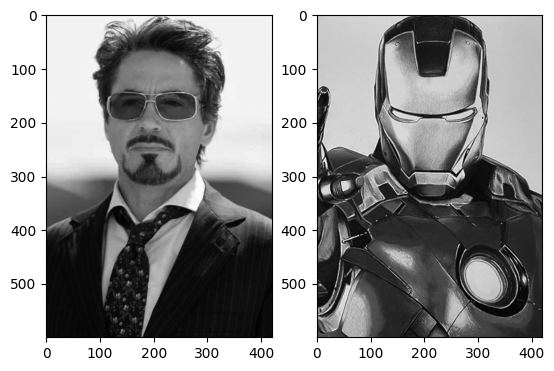

In [32]:
im0 = load('fig/Tony_Stark.png')
im1 = load('fig/Ironman.png')

fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(im0, cmap='gray')
ax1.imshow(im1, cmap='gray')

In [33]:
# Compute the 2D FFT of both images

Im0 = np.fft.fft2(im0)
Im1 = np.fft.fft2(im1)

In [34]:
# We create image 2 using amplitude information from image 0 and phase
# information from image 1

Im2 = abs(Im0) * np.exp(1j * np.angle(Im1))
im2 = np.real(np.fft.ifft2(Im2))

In [35]:
# ... and the opposite for image 3

Im3 = abs(Im1) * np.exp(1j * np.angle(Im0))
im3 = np.real(np.fft.ifft2(Im3))

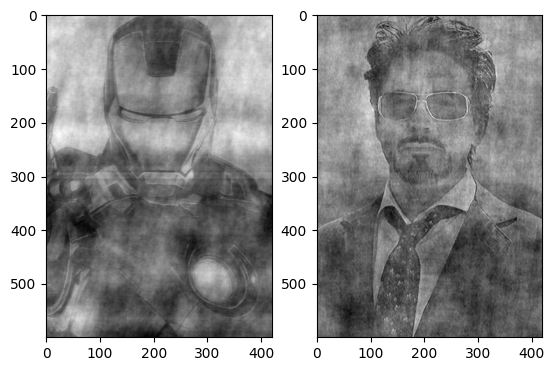

In [36]:
# What do you think `im2` and `im3` would look like?

fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(im2, cmap='gray')
ax1.imshow(im3, cmap='gray')

In [37]:
# HANDSON: create more images using different combination of power
#          spectra and phase spectra.  Whawt do you see?


### Hybrid Images (Monroe-Einstein)

![Marylin Einstein](fig/MonroeEnstein_AudeOliva2007.jpg)

A famous demonstration of amplitude and phase in images is this
Monroe-Einstein hybrid image by Aude Oliva (2007).
From a distance, the image looks like Marilyn Monroe, while up close
it resembles Albert Einstein.
This illusion arises because high spatial frequencies (fine details,
carried largely by phase) dominate at close range, while low spatial
frequencies (broad shapes, carried by amplitude) dominate when viewed
afar.

In [38]:
# HANDSON: using the Tony Stark and Ironman we shown in the previous
#          demo, construct a Stark-Ironman hybrid image usiung FFT.


## Convolution and Correlation

Convolution and correlation are important operations in signal
processing and computational astrophysics.
Both involve multiplying two functions and summing (or integrating)
over shifts, but they differ in whether one function is reversed.

Convolution describes how a signal is modified by another, often used
to model system response.
Correlation measures the similarity between signals as a function of
relative shift.
Their close relationship becomes especially powerful when analyzed
with the Fourier Transform.

For continuous functions $f(t)$ and $g(t)$, the convolution is
\begin{align}
  (f * g)(t) &= \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau \\
             &= \int_{-\infty}^{\infty} f(t - \tau) g(\tau) d\tau.
\end{align}

In the discrete case, for sequences $f_n$ and $g_n$,
\begin{align}
  (f * g)_n = \sum_{m=0}^{N-1} f_m g_{n-m}.
\end{align}

Convolution measures the overlap of $f$ with a reversed and
shifted version of $g$.
It can be visualized as sliding $g$ across $f$, multiplying, and
summing at each shift.

The cross-correlation of $f(t)$ and $g(t)$ is
\begin{align}
  (f \star g)(t) &= \int_{-\infty}^{\infty} f^*(\tau) g(\tau + t) d\tau \\
                 &= \int_{-\infty}^{\infty} f^*(\tau - t) g(\tau) d\tau,
\end{align}
where $f^*$ denotes the complex conjugate.

In the discrete case,
\begin{align}
  (f \star g)_n = \sum_{m=0}^{N-1} f^*_m g_{m+n}.
\end{align}

Correlation measures the similarity between $f$ and a shifted version
of $g$, without reversal.
Complex conjugation ensures that phase information is handled
correctly.

* Both operations involve multiplying one function with a shifted
  version of the other.
* Convolution reverses one function before shifting.
* Correlation shifts directly (with conjugation if complex).
* For real, symmetric functions, the two operations coincide.

### Convolution and Correlation Theorems

The Convolution Theorem states that convolution in the time domain
corresponds to multiplication in the frequency domain:
\begin{align}
  \mathcal{F}\{ f(t) * g(t) \} = F_\omega G_\omega,
\end{align}
where $F_\omega$ and $G_\omega$ are the Fourier transforms of $f(t)$
and $g(t)$.

The Correlation Theorem states that cross-correlation in the time
domain corresponds to multiplication by a conjugate in the frequency
domain:
\begin{align}
  \mathcal{F}\{ f(t) \star g(t) \} = F_\omega^* G_\omega,
\end{align}
where $F_\omega^*$ is the complex conjugate of $F_\omega$.

Both theorems link time-domain operations (convolution or correlation)
to multiplication in the frequency domain.
The difference is in the complex conjugate:
* Convolution: $F_\omega   G_\omega$
* Correlation: $F_\omega^* G_\omega$

This distinction reflects the time reversal in convolution versus the
direct similarity measured by correlation.

### Practical Implications

Understanding these theorems allows us to compute convolution and
correlation efficiently using FFT.

Instead of performing $\mathcal{O}(N^2)$ operations in the time
domain, we can perform the following steps:
1. Compute the Fourier Transforms $F_\omega$ and $G_\omega$ of the
   signals using the FFT ($\mathcal{O}(N \log N)$ operations).
2. Perform element-wise multiplication:
   * For convolution: Multiply $F_\omega$   and $G_\omega$.
   * For correlation: Multiply $F_\omega^*$ and $G_\omega$.
3. Compute the inverse Fourier Transform of the product to obtain the
   result in the time domain.

In [39]:
N = 64
f = np.pad(np.ones(N//2),                            (N//4, N//4), mode='constant')
g = np.pad(np.linspace(1,0,endpoint=False,num=N//2), (N//4, N//4), mode='constant')

conv1 = np.array([np.sum(f * np.roll(g[::-1], 1+t)) for t in range(len(g))])
conv2 = np.array([np.sum(np.roll(f[::-1], 1+t) * g) for t in range(len(f))])
conv3 = np.real(ifft(fft(f) * fft(g)))

corr1 = np.array([np.sum(f.conj() * np.roll(g, -t)) for t in range(len(g))])
corr2 = np.array([np.sum(np.roll(f.conj(),  t) * g) for t in range(len(f))])
corr3 = np.real(ifft(fft(f).conj() * fft(g)))

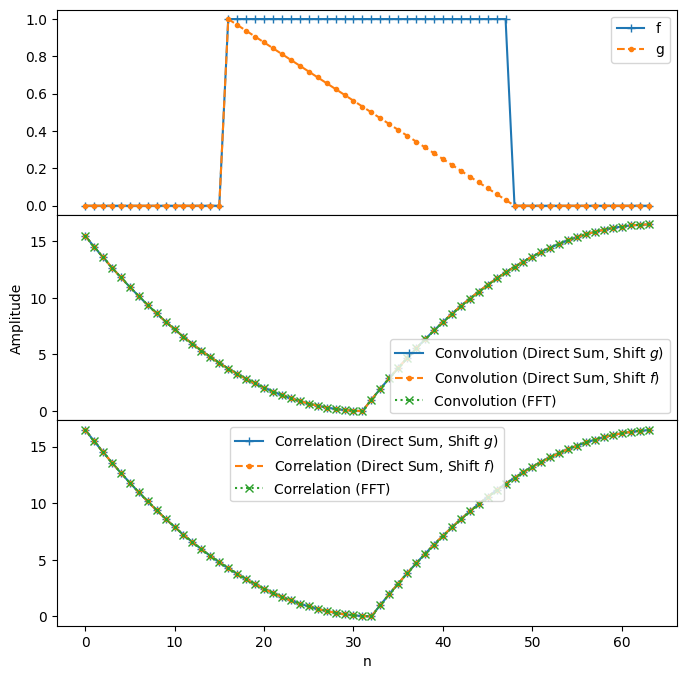

In [40]:
fig, axes = plt.subplots(3,1, figsize=(8, 8), sharex=True)
plt.subplots_adjust(hspace=0)

axes[0].plot(f, '+-',  label='f')
axes[0].plot(g, '.--', label='g')
axes[0].legend()

axes[1].plot(conv1, '+-',  label='Convolution (Direct Sum, Shift $g$)')
axes[1].plot(conv2, '.--', label='Convolution (Direct Sum, Shift $f$)')
axes[1].plot(conv3, 'x:',  label='Convolution (FFT)')
axes[1].set_ylabel('Amplitude')
axes[1].legend()

axes[2].plot(corr1, '+-',  label='Correlation (Direct Sum, Shift $g$)')
axes[2].plot(corr2, '.--', label='Correlation (Direct Sum, Shift $f$)')
axes[2].plot(corr3, 'x:',  label='Correlation (FFT)')
axes[2].set_xlabel('n')
axes[2].legend()

The above plots show that the results obtained via direct computation
in the time domain match those obtained using FFT.
They confirm both the Convolution and Correlation Theorems.

In [41]:
# HANDSON: increase the number of sampling points and compare the time
#          required to perform convolution and correlation using
#          direct sums and FFTs.


### Parseval's Theorem

Parseval's Theorem links the time and frequency domains by showing
that a signal's total energy is the same in both.
For a discrete signal $f_n$ of length $N$ with DFT $F_k$,
\begin{align}
  \sum_{n=0}^{N-1} |f_n|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |F_k|^2.
\end{align}
This relation means that the squared magnitude of the signal (its
energy or power) is preserved under the Fourier Transform.
No energy is lost or gained by moving between the time and frequency
domains.
This implies
* Convolution:
  Energy may be redistributed over time, but Parseval's Theorem
  guarantees that the total energy remains the same.
* Correlation:
  Since correlation measures similarity, Parseval's Theorem ensures
  that this comparison is consistent whether performed in the time or
  frequency domain.


In [42]:
g = np.random.normal(size=10_000)
G = fft(g)

E_g = np.sum(abs(g) ** 2)           # compute energy in the time domain
E_G = np.sum(abs(G) ** 2) / len(G)  # compute energy in the frequency domain

print(f"Energy of g[n] in time      domain: {E_g}")
print(f"Energy of g[n] in frequency domain: {E_G}")

Energy of g[n] in time      domain: 9882.383977437381
Energy of g[n] in frequency domain: 9882.383977437383


In [43]:
# HANDSON: modify the number of sampling points and the signal to
#          confirm that Parseval's Theorem holds generally.


## Other Interesting Toipics:

* Time-frequency analysis
* Power spectrum estimation using the FFT (See
  [Numerical Recipes](https://numerical.recipes/book.html)
  Section 13.4.)
* Denoising and signal processing applications
* Astrophysical applications and
  [VLBI](https://focisrc.github.io/eht-databook/intro/correlation.html)
* Calibration algorithm for ADC interleaving
* Spectral derivatives and spectral methods (for solving PDEs,
  including the heat equation).
